# Preprocessing
This script loads the images and crops them down multiple times for each cell, that is contained in the image.

In [94]:
import numpy as np
import os
from pathlib import Path
from PIL import Image
import json
import matplotlib.pyplot as plt

In [75]:
# ------------  CONFIG  -------------------
base_path = '/scratch/cv-course-group-5/data/dataset_jpg'
vid_id_test = '100'
src_root   = Path(base_path + '/dataset')
dst_root   = Path(base_path + '/preprocessed_dataset')
anno_file  = Path(base_path + '/dataset/annotations.json')

In [76]:
# define paths for specific video folder
org_video_folder = src_root / vid_id_test / 'images'
dst_video_folder = dst_root / vid_id_test / 'images'
dst_video_folder.mkdir(parents=True, exist_ok=True)

In [ ]:
# load annotations
annos_dict = json.loads(anno_file.read_text())

annos = annos_dict.get('annotations', [])
videos = annos_dict.get('videos', [])
images = annos_dict.get('images', [])

video_id2name = {v["id"]: v["name"] for v in videos}
image_by_id = {img["id"]: img for img in images} 

In [89]:
# reorder annotations in new dictionary
annos_sorted = {}

for ann in annos:
    video_id = ann["video_id"]
    image_id = ann["image_id"]

    frame_nmbr = image_by_id[image_id]['file_name'][-7:-4]
    video_name = video_id2name[video_id]
    
    if video_name not in annos_sorted:
        annos_sorted[video_name] = {}
    if frame_nmbr not in annos_sorted[video_name]:
        annos_sorted[video_name][frame_nmbr] = []

    annos_sorted[video_name][frame_nmbr].append(ann)

In [90]:
annos_by_frame = annos_sorted[vid_id_test]
annos_by_frame

{'001': [{'id': 616086,
   'image_id': 14551,
   'video_id': 98,
   'cell_id': 1,
   'parent_label': None,
   'category_id': 1,
   'first_frame': 0,
   'centroid': [12, 122],
   'bbox': [14, 108, 28, 74],
   'area': 2072,
   'iscrowd': 0,
   'time_of_death': None,
   'time_of_division': 16,
   'time_step': 0},
  {'id': 616087,
   'image_id': 14551,
   'video_id': 98,
   'cell_id': 5,
   'parent_label': None,
   'category_id': 1,
   'first_frame': 0,
   'centroid': [135, 237],
   'bbox': [127, 238, 69, 47],
   'area': 3243,
   'iscrowd': 0,
   'time_of_death': None,
   'time_of_division': 16,
   'time_step': 0},
  {'id': 616088,
   'image_id': 14551,
   'video_id': 98,
   'cell_id': 9,
   'parent_label': None,
   'category_id': 1,
   'first_frame': 0,
   'centroid': [313, 277],
   'bbox': [317, 271, 64, 45],
   'area': 2880,
   'iscrowd': 0,
   'time_of_death': None,
   'time_of_division': 9,
   'time_step': 0},
  {'id': 616089,
   'image_id': 14551,
   'video_id': 98,
   'cell_id': 13,

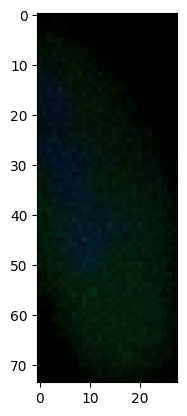

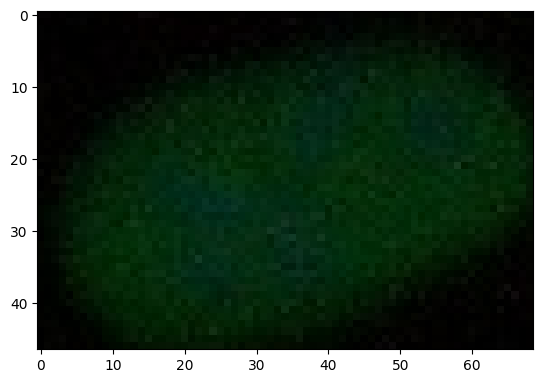

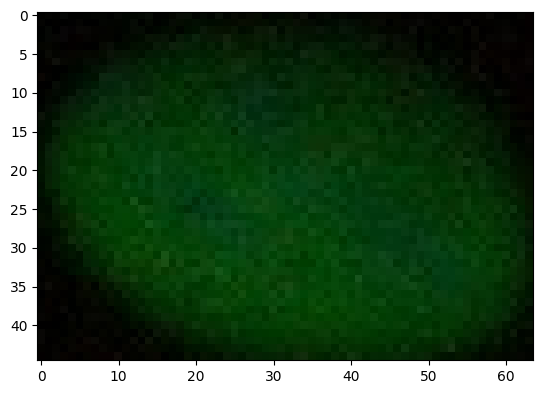

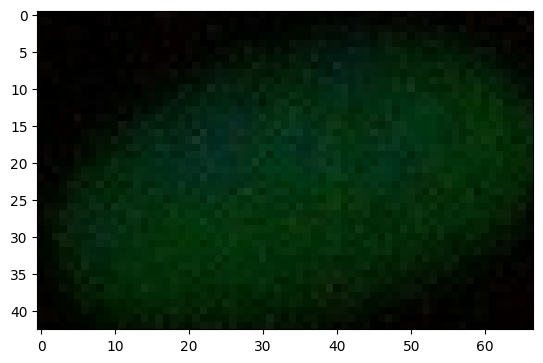

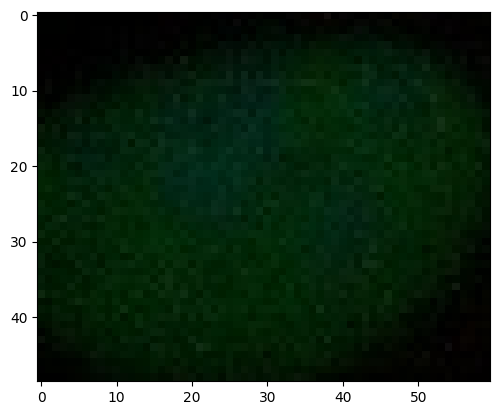

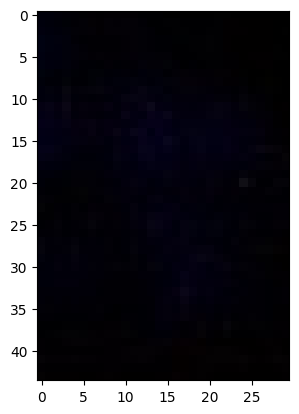

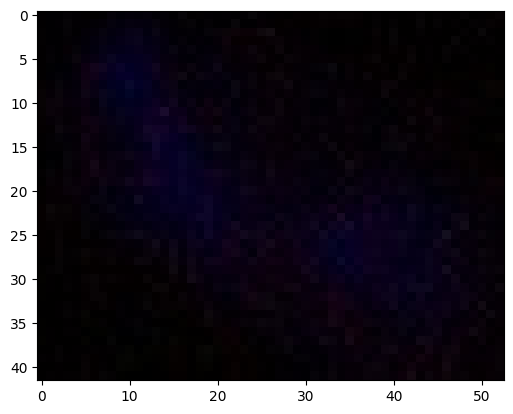

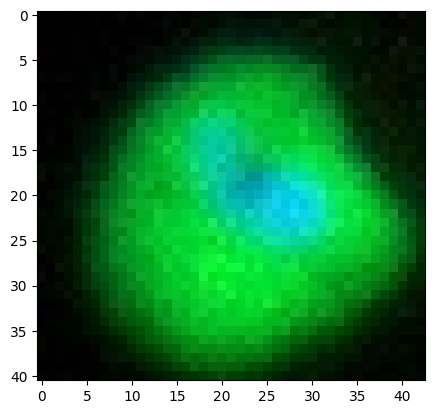

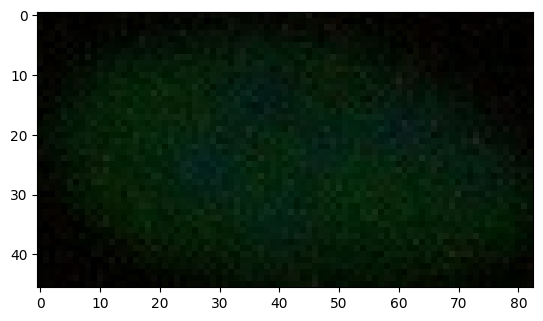

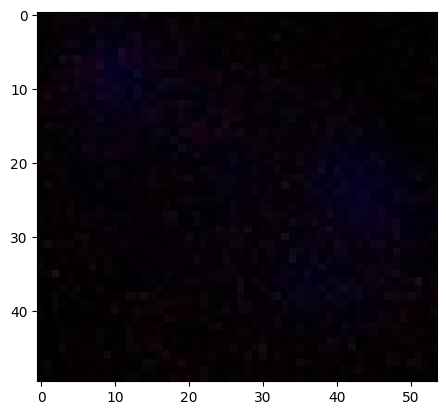

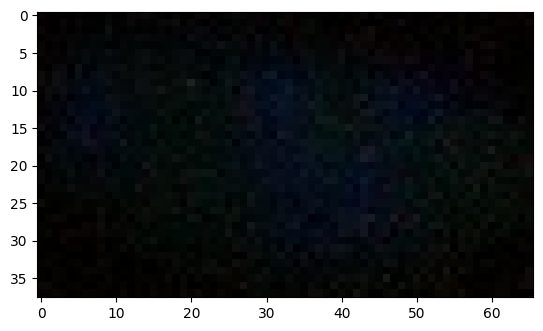

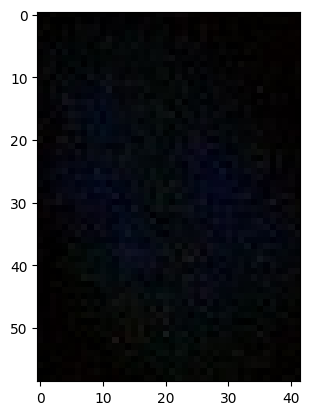

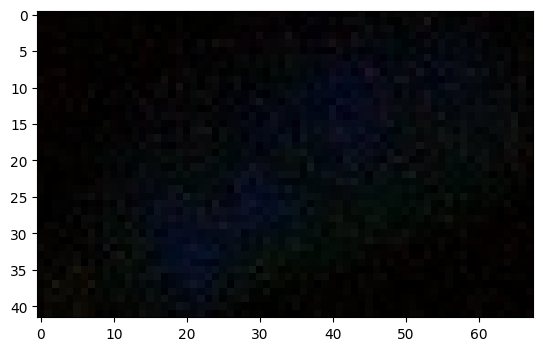

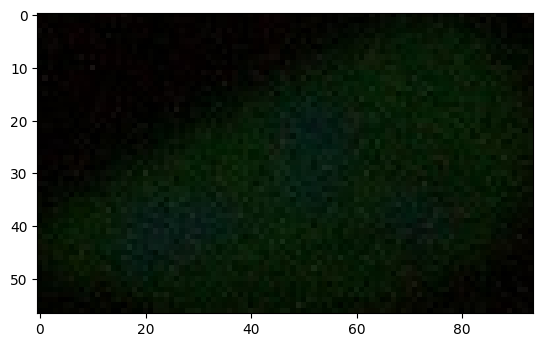

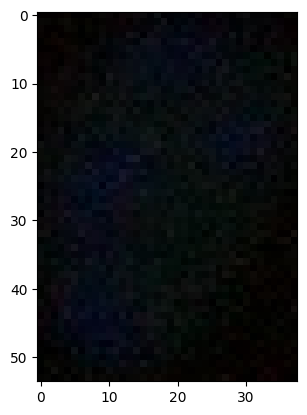

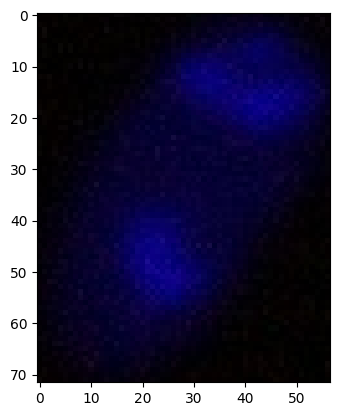

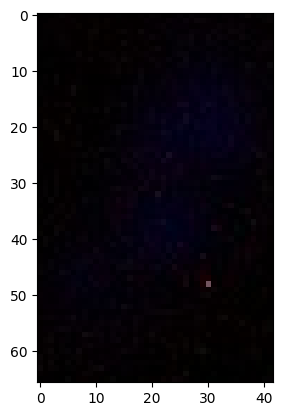

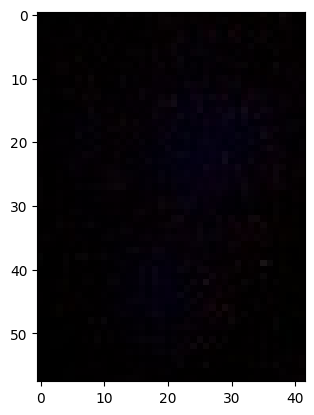

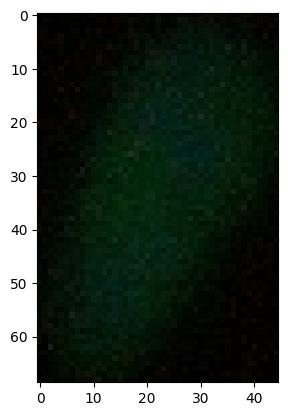

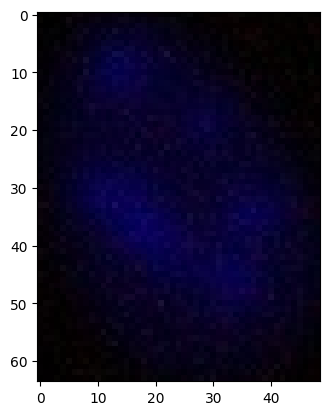

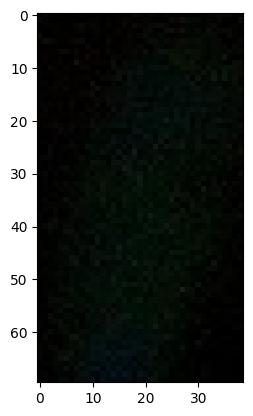

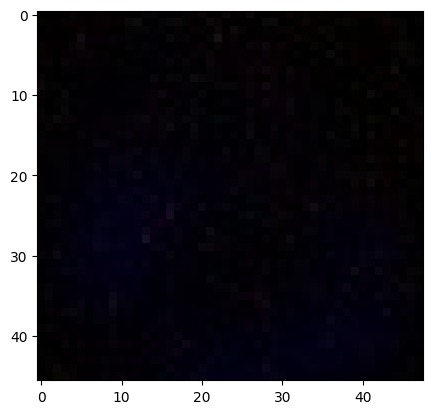

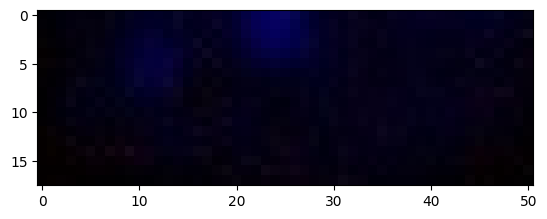

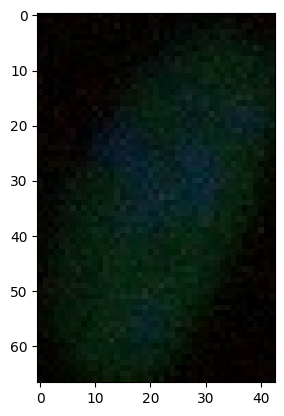

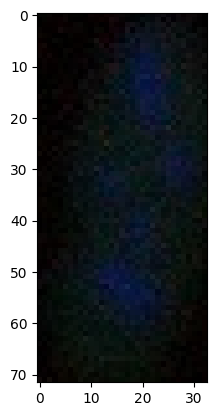

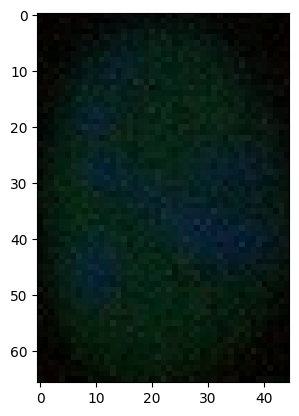

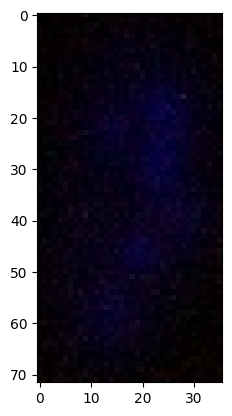

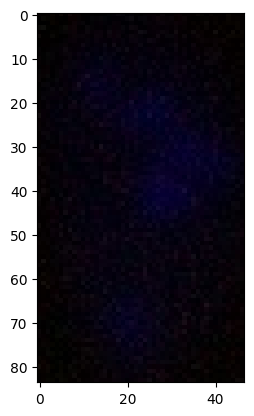

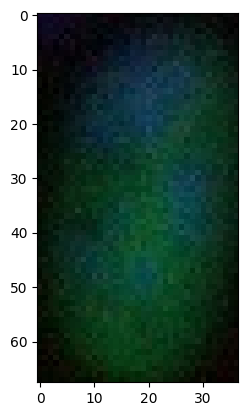

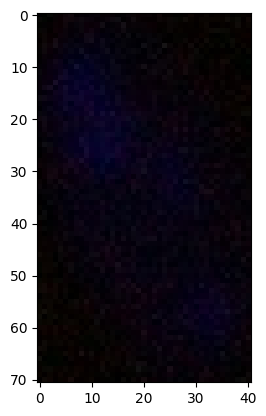

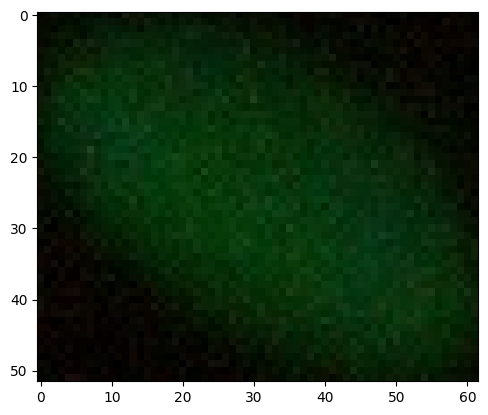

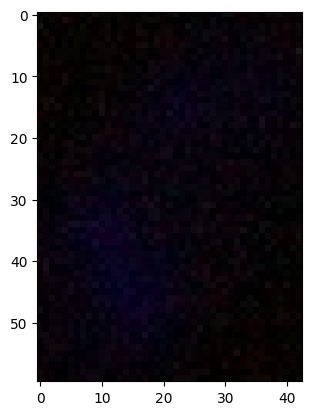

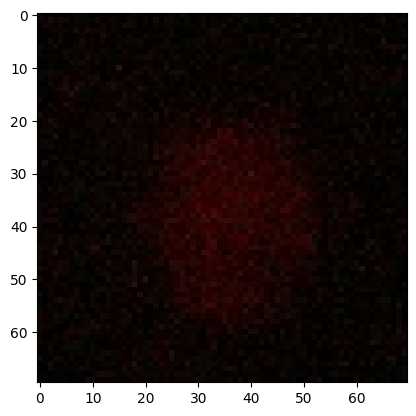

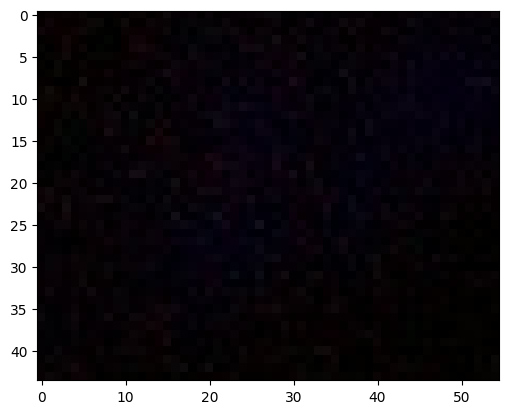

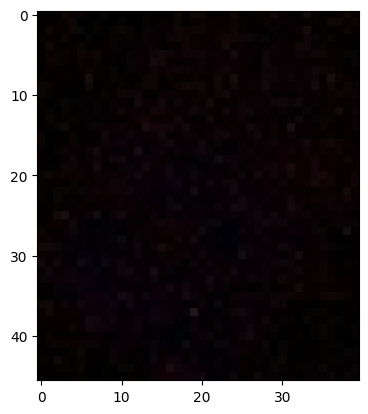

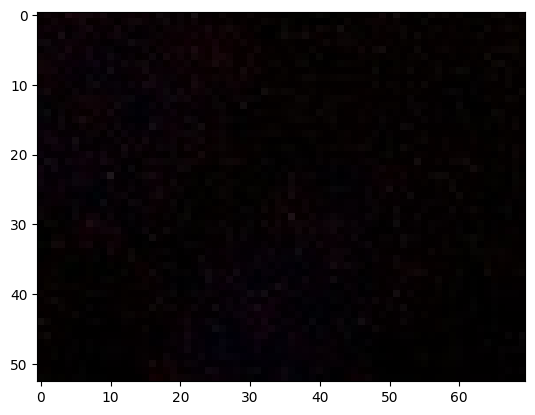

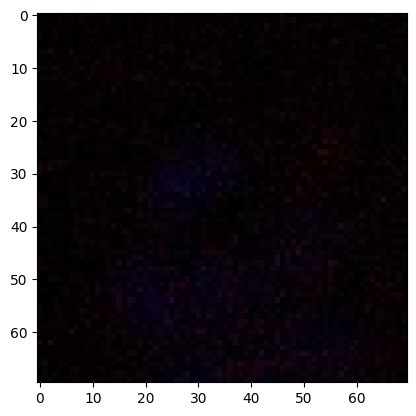

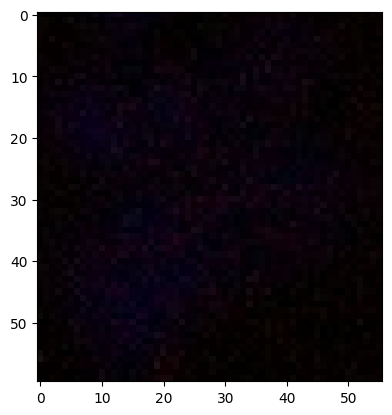

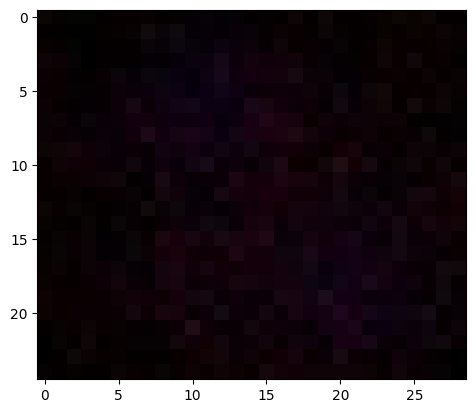

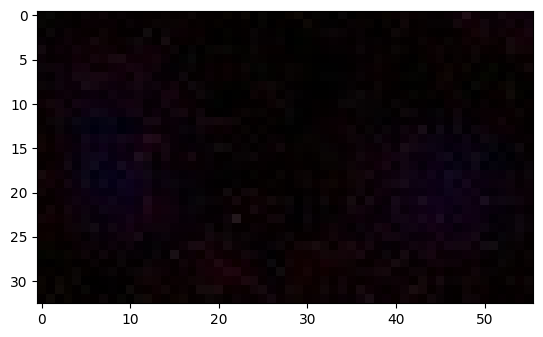

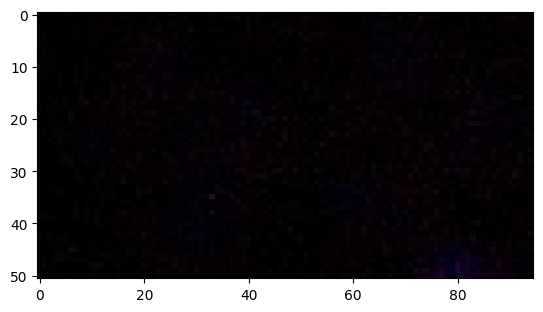

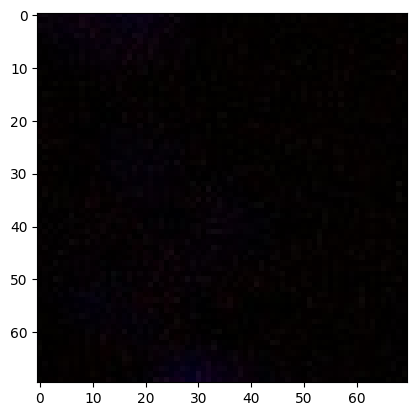

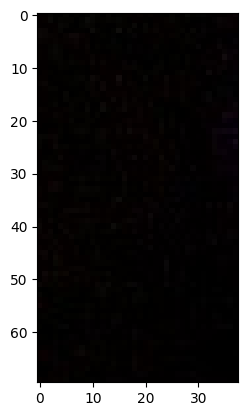

In [97]:
annos_by_frame = annos_sorted[vid_id_test]

# iterate over every image file in that folder
for img_path in sorted(org_video_folder.glob("*.jpg"))[:1]:
    # frame index is the last 3 digits in “…t086.jpg”
    frame_idx = img_path.stem[-3:]

    # skip if no cells in this frame
    if frame_idx not in annos_by_frame:
        print(img_path)
        continue
    
    img = Image.open(img_path).convert("RGB")
    # plt.imshow(img)
    # plt.show()

    for ann in annos_by_frame[frame_idx]:
        x_c, y_c, w, h = ann['bbox']
        left   = int(x_c - w / 2)
        upper  = int(y_c - h / 2)
        right  = int(x_c + w / 2)
        lower  = int(y_c + h / 2)

        cell_crop = img.crop((left, upper, right, lower))

        plt.imshow(cell_crop)
        plt.show()

        #save_name  = f"{frame_idx:03d}_{ann['cell_id']:04d}.png"
        #cell_crop.save(dst_video / save_name)


In [ ]:
# # iterate over every image file in that folder
# for img_path in sorted(org_video_folder.glob("*.jpg")):
#     # frame index is the last 3 digits in “…t086.jpg”
#     frame_idx = int(img_path.stem[-3:])
#     # no cells in this frame? skip
#     if frame_idx not in by_frame:
#         continue
    
#     img = Image.open(img_path).convert("RGB")
    
#     for ann in by_frame[frame_idx]:
#         x, y, w, h = ann["bbox"]          # [left, top, width, height]
#         cell_crop  = img.crop((x, y, x+w, y+h))
#         save_name  = f"{frame_idx:03d}_{ann['cell_id']:04d}.png"
#         cell_crop.save(dst_video / save_name)

# print("✅ Cropping complete")